In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from matplotlib.patches import Patch
from tqdm import tqdm
import torch.utils
from torch.utils.data import DataLoader
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Define the network layers as modules in a Sequential container
        self.layers = nn.Sequential(
            nn.Linear(2, 3),  # First layer: 2 inputs, 3 neurons
            nn.ReLU(),        # ReLU activation after first layer
            nn.Linear(3, 1),  # Second layer: 3 inputs from previous layer, 1 output
            nn.Sigmoid()      # Sigmoid activation for binary classification output
        )
    
    def forward(self, x):
        # Forward pass through the entire network
        return self.layers(x)
    
    def encode(self, x):
        # Method to get the activations from the first layer
        for layer in self.layers:
            x = layer(x)
            if isinstance(layer, nn.ReLU):
                break  # Stop after applying ReLU to get the hidden layer activations
        return x

# Example instantiation and usage
model = SimpleNN()
model.to(device)

SimpleNN(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=3, bias=True)
    (1): ReLU()
    (2): Linear(in_features=3, out_features=1, bias=True)
    (3): Sigmoid()
  )
)

In [3]:
def sample_circle(num_points=1000, radius=30,  sigma=2.0, theta_interval_1=[np.pi/4, np.pi/3], theta_interval_2=[np.pi/4, np.pi/3] ):

		sample_theta = np.random.rand(num_points)*2.0*np.pi
		sample_radius = radius  + np.random.randn(num_points)*sigma
		
		region_1 = np.where((sample_theta > theta_interval_1[0])*(sample_theta < theta_interval_1[1]), True, False)
		region_2 = np.where((sample_theta > theta_interval_2[0])*(sample_theta < theta_interval_2[1]), True, False)

		labels = region_1 + region_2
		positions = np.vstack([sample_radius*np.cos(sample_theta), sample_radius*np.sin(sample_theta)]).T
		return positions, labels

(-70.83378825039915, 71.05930063195687, -70.41358235022462, 72.46463410916738)

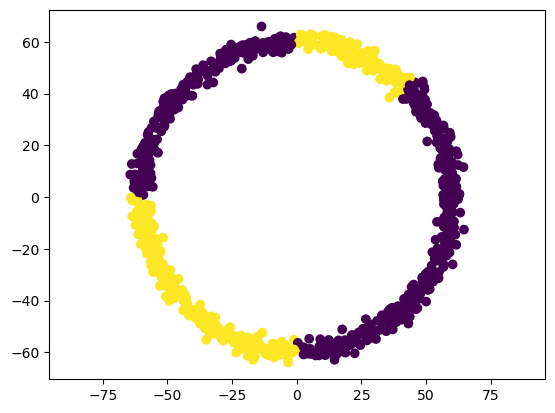

In [4]:
data, labels = sample_circle(num_points=1000, radius=60, theta_interval_1=[np.pi, (3/2.0)*np.pi], theta_interval_2=[np.pi/4, np.pi/2])

points_tensor = torch.tensor(data).to(torch.float32)
labels_tensor = torch.tensor(labels*1.0).reshape((-1,1)).to(torch.float32)

plt.scatter(data[:,0], data[:,1], c=labels)
plt.axis('equal')

In [5]:
ring_type = 'single'

input_dim = points_tensor.shape[1]
output_dim = labels_tensor.shape[1]
data_points = points_tensor.shape[0]

batch_size = 32

learning_rate = 5e-4
epochs = 1000
    
dataset = torch.utils.data.TensorDataset(points_tensor, labels_tensor)

# Define dataloader generating batch_size big data samples
train_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

Training Progress:   0%|          | 0/2000 [00:00<?, ?it/s]

Epoch 1, Loss: 0.5766


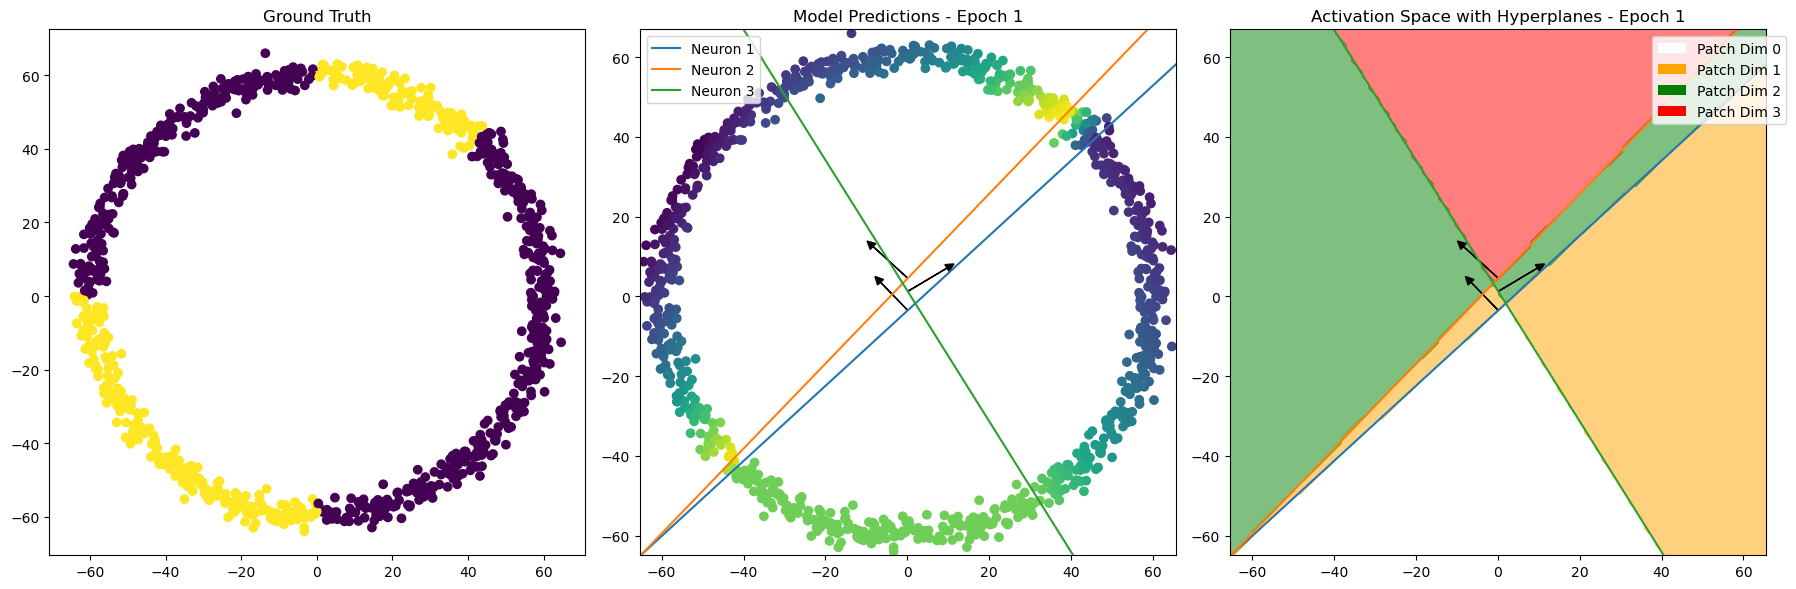

Training Progress:   5%|▍         | 99/2000 [00:04<01:27, 21.70it/s]

Epoch 100, Loss: 0.2301


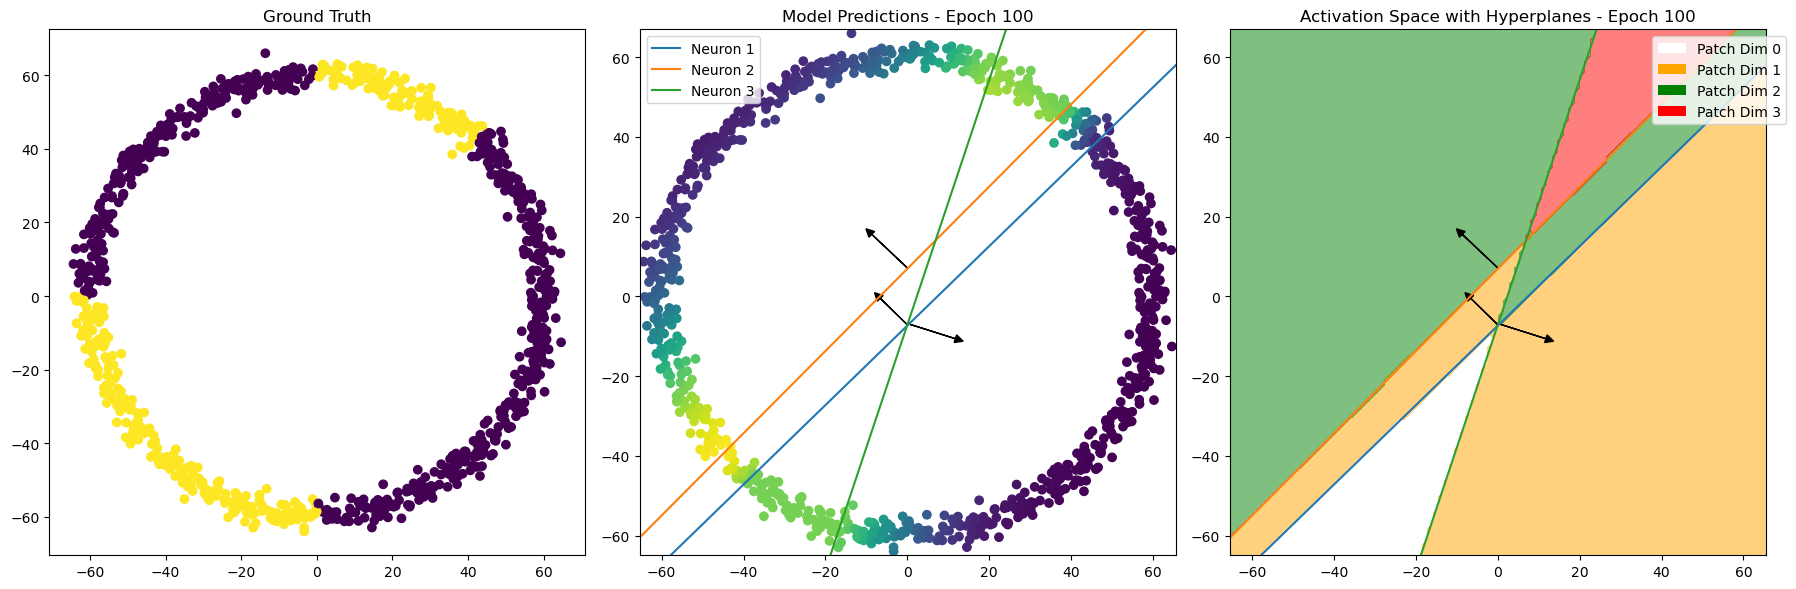

Training Progress:  10%|▉         | 198/2000 [00:09<01:21, 22.11it/s]

Epoch 200, Loss: 0.1321


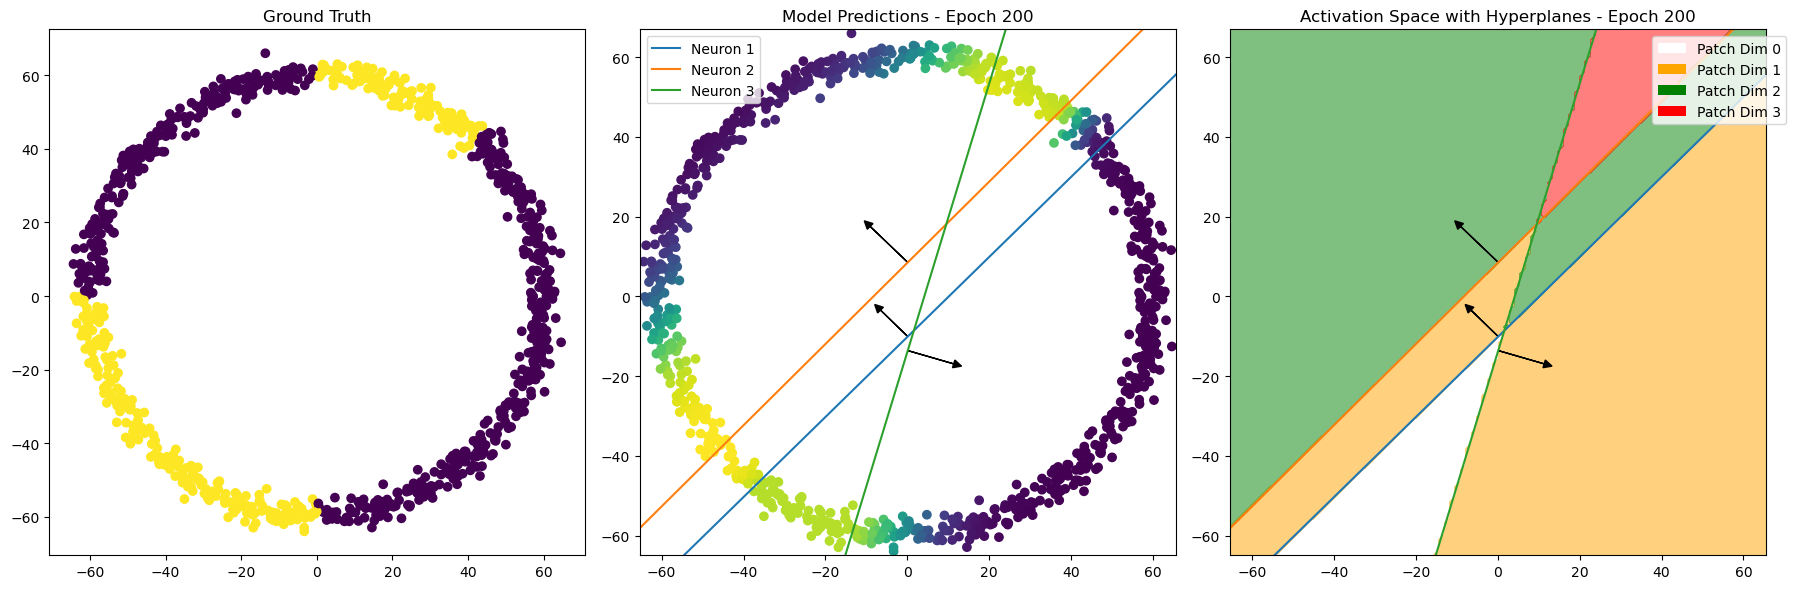

Training Progress:  15%|█▍        | 299/2000 [00:14<01:13, 23.23it/s]

Epoch 300, Loss: 0.0922


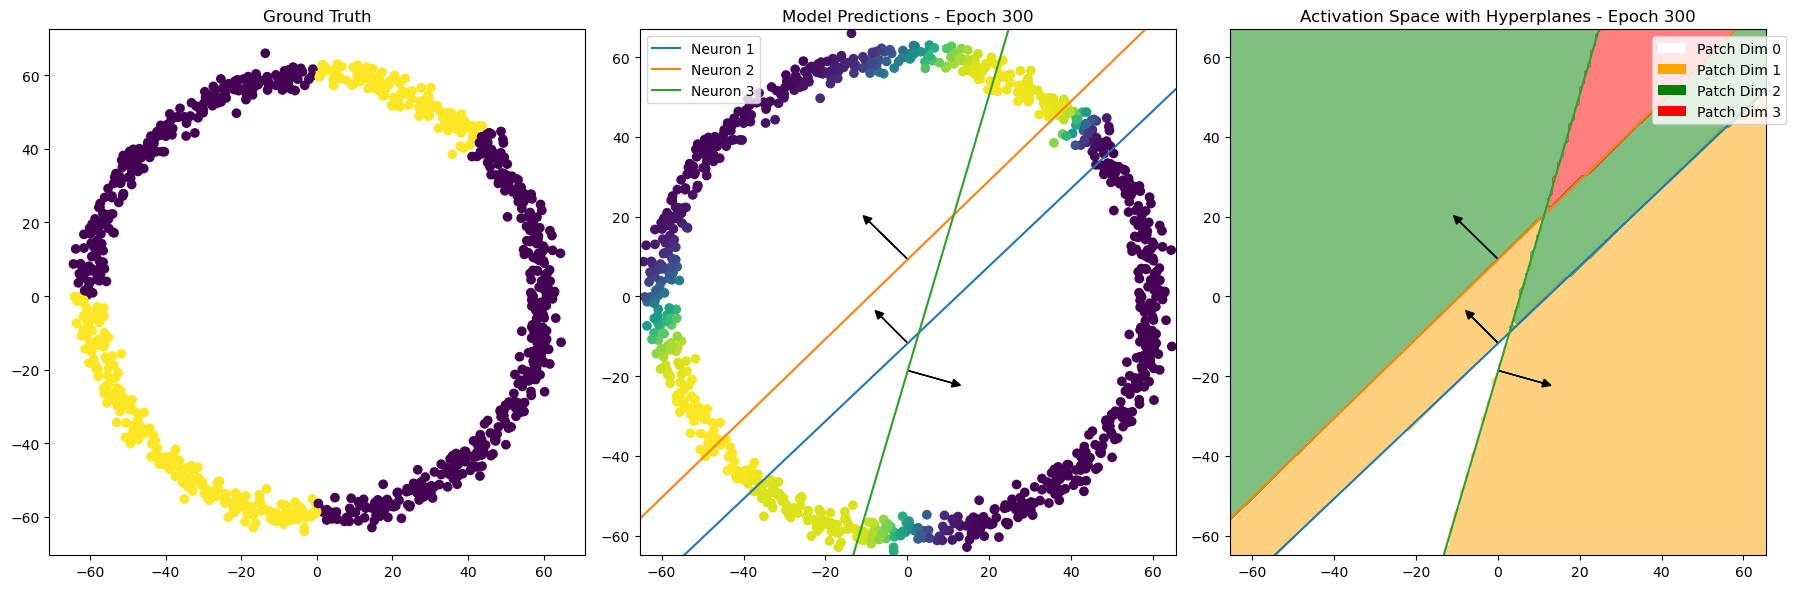

Training Progress:  20%|█▉        | 398/2000 [00:19<01:13, 21.69it/s]

Epoch 400, Loss: 0.0728


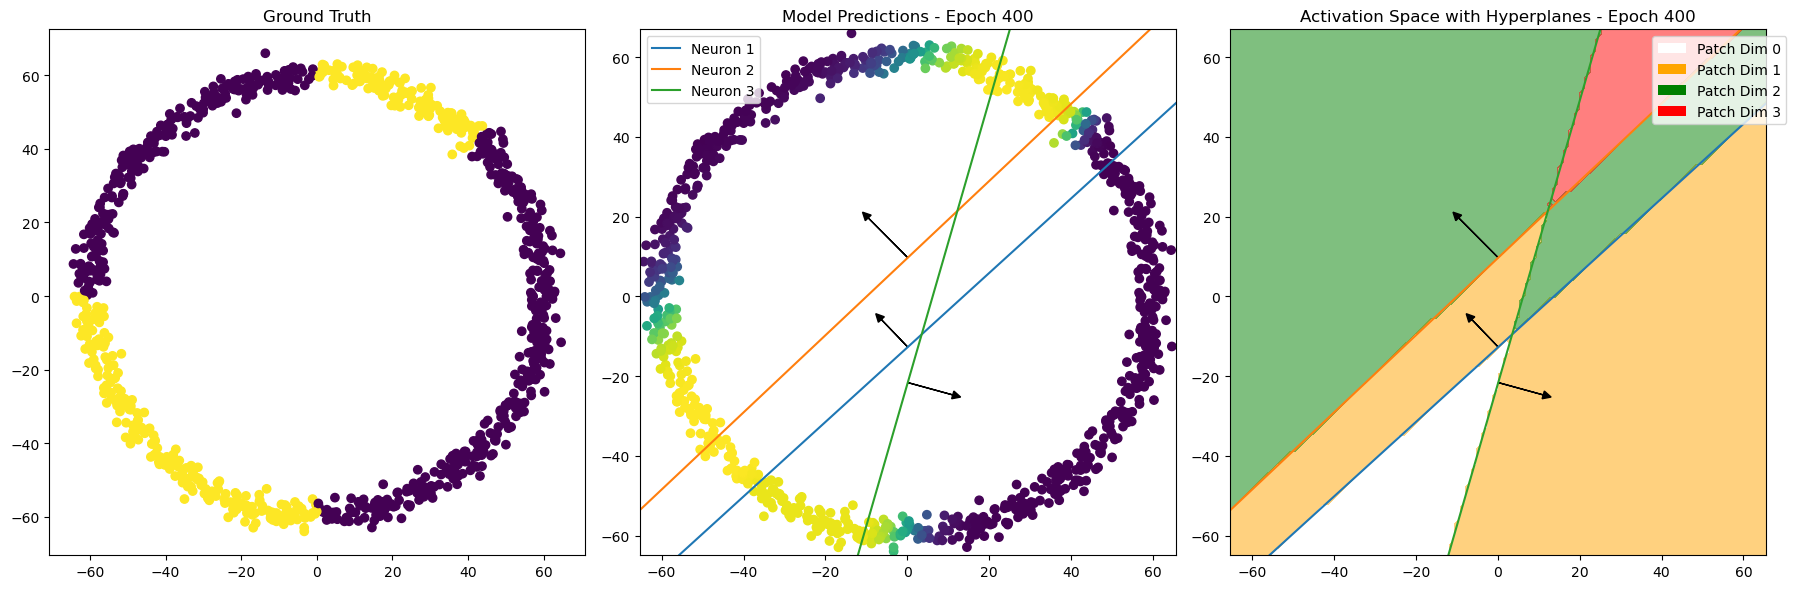

Training Progress:  25%|██▍       | 497/2000 [00:24<01:05, 22.86it/s]

Epoch 500, Loss: 0.0620


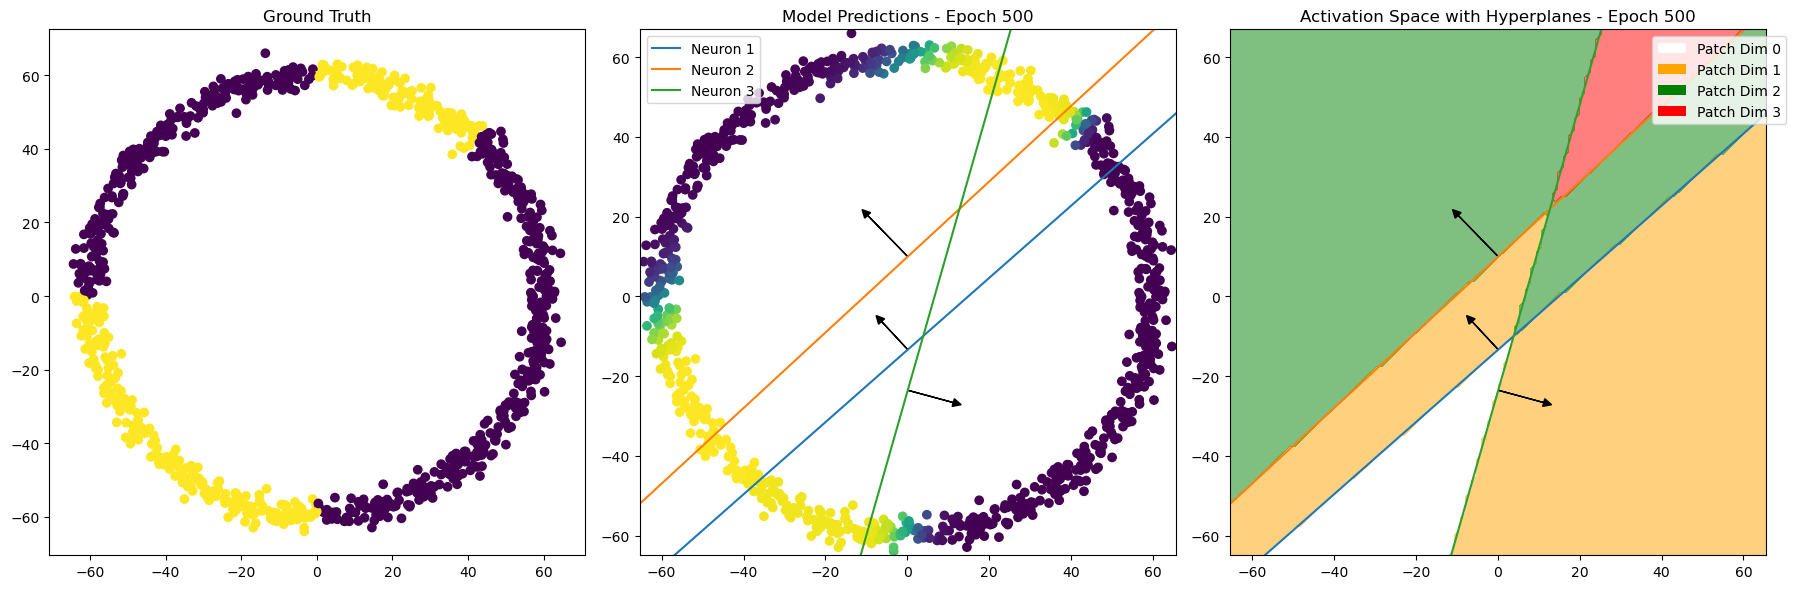

Training Progress:  30%|██▉       | 599/2000 [00:28<00:59, 23.47it/s]

Epoch 600, Loss: 0.0546


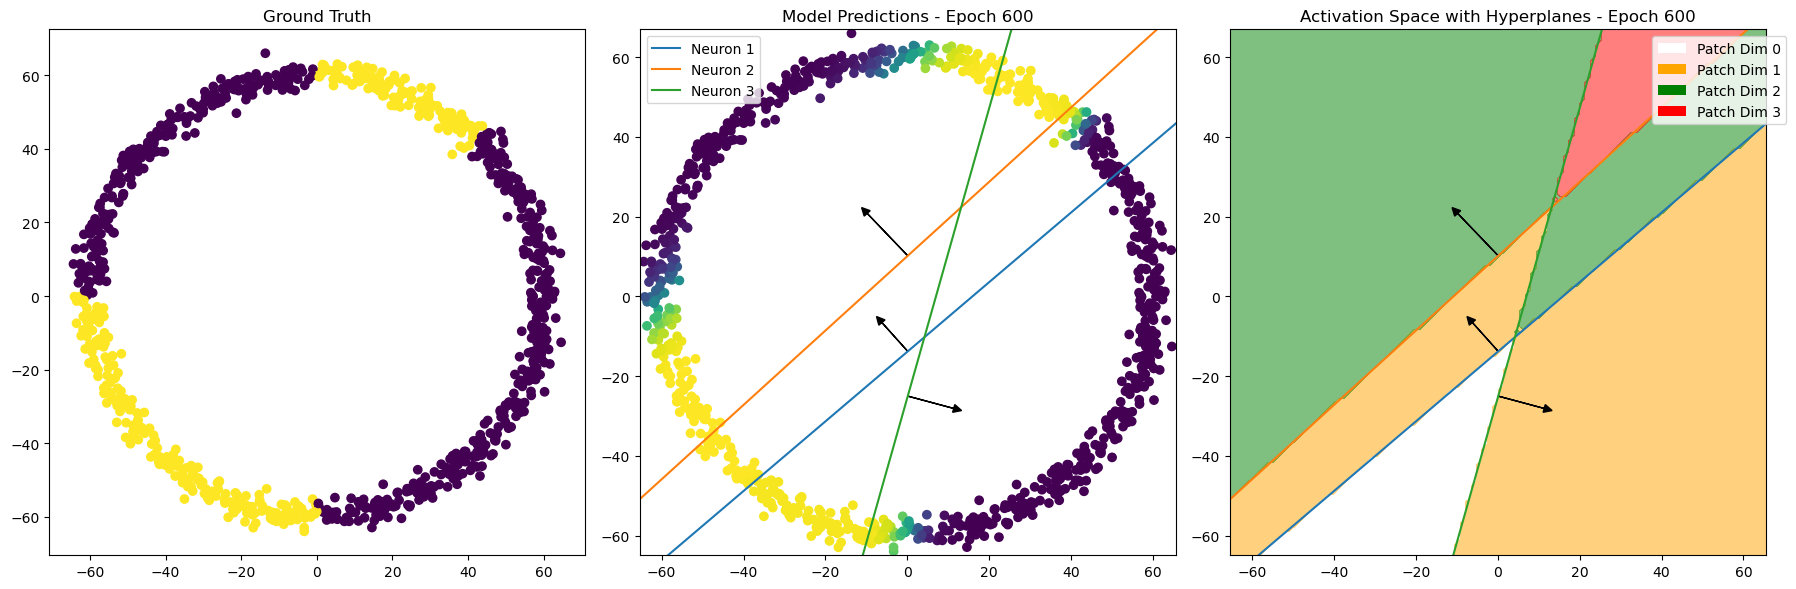

Training Progress:  35%|███▍      | 698/2000 [00:33<01:05, 20.03it/s]

Epoch 700, Loss: 0.0510


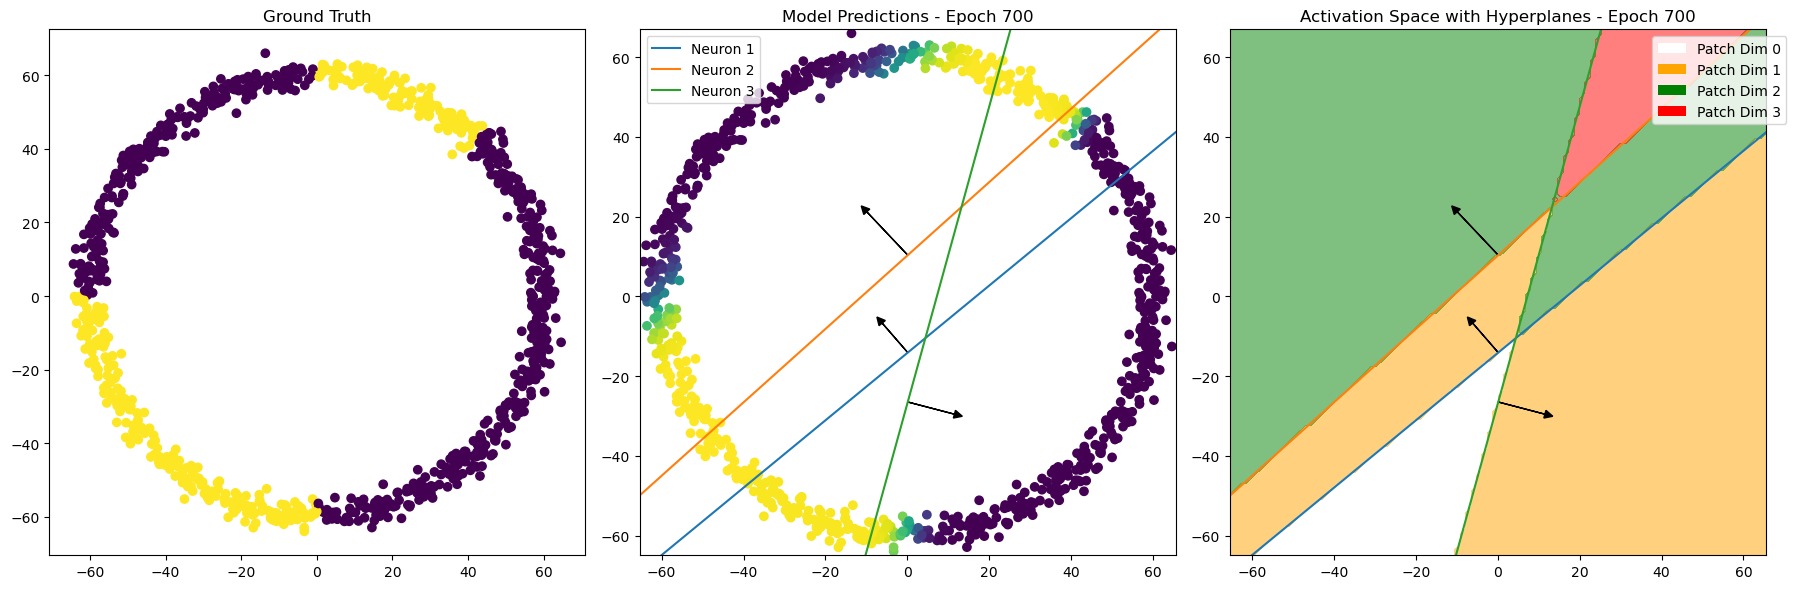

Training Progress:  40%|███▉      | 797/2000 [00:38<00:52, 22.72it/s]

Epoch 800, Loss: 0.0471


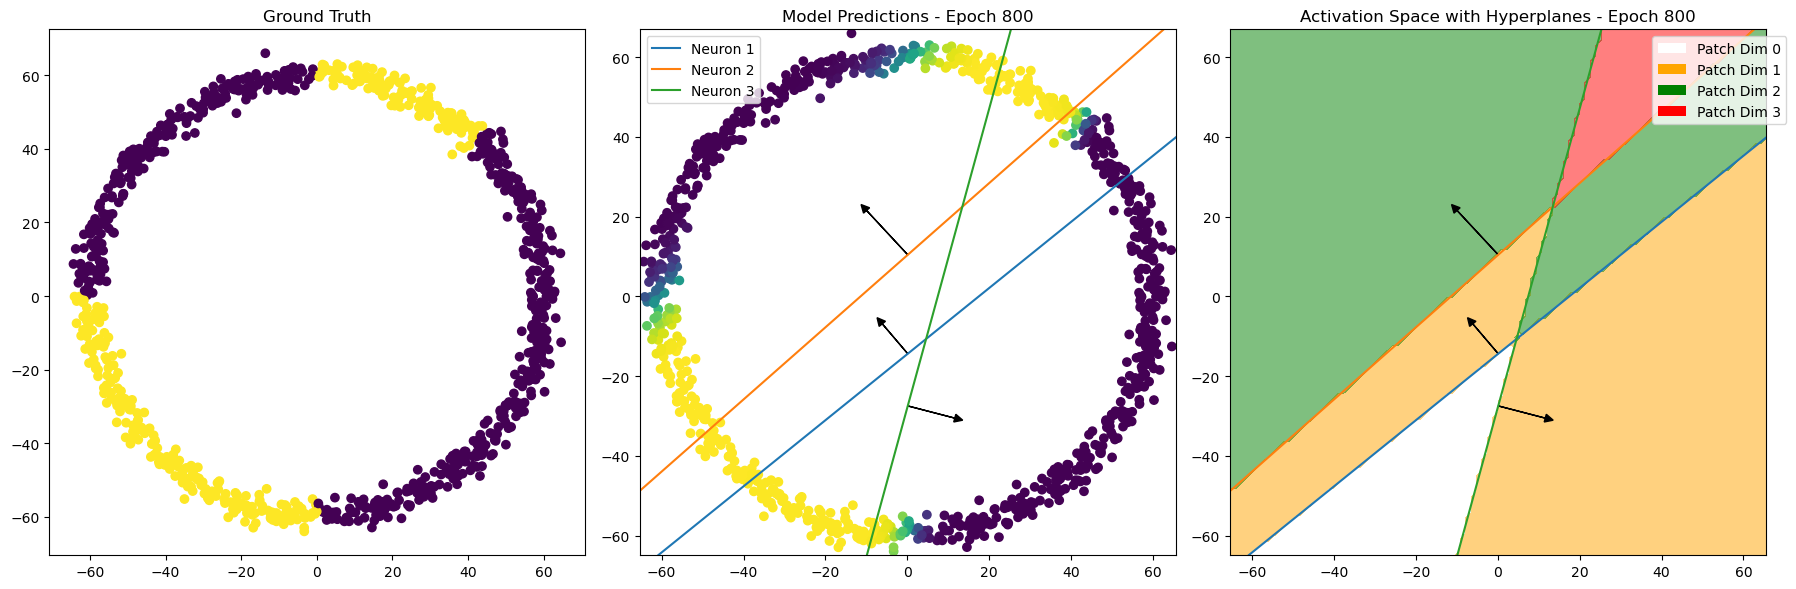

Training Progress:  45%|████▍     | 898/2000 [00:43<00:50, 21.82it/s]

Epoch 900, Loss: 0.0466


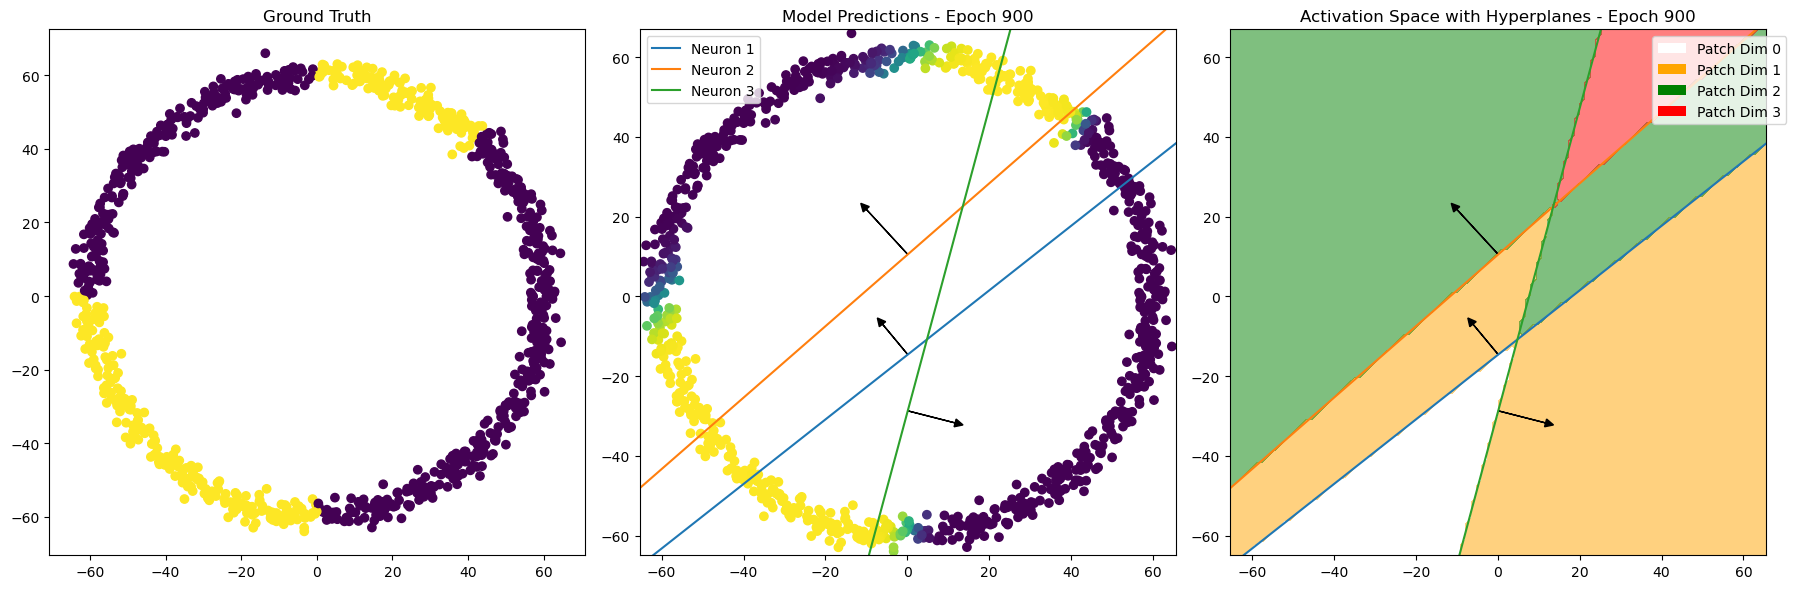

Training Progress:  50%|████▉     | 999/2000 [00:48<00:44, 22.63it/s]

Epoch 1000, Loss: 0.0448


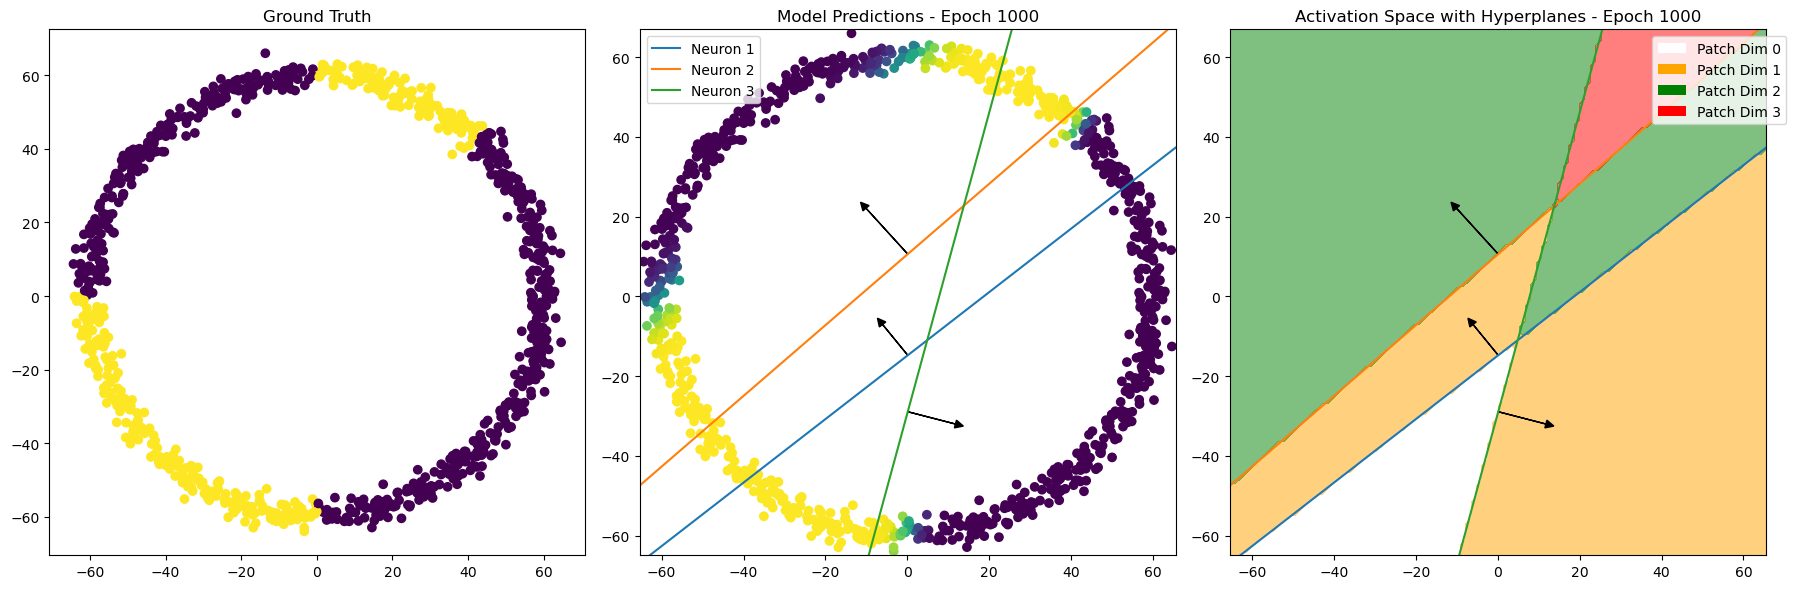

Training Progress:  55%|█████▍    | 1097/2000 [00:53<00:39, 22.70it/s]

Epoch 1100, Loss: 0.0403


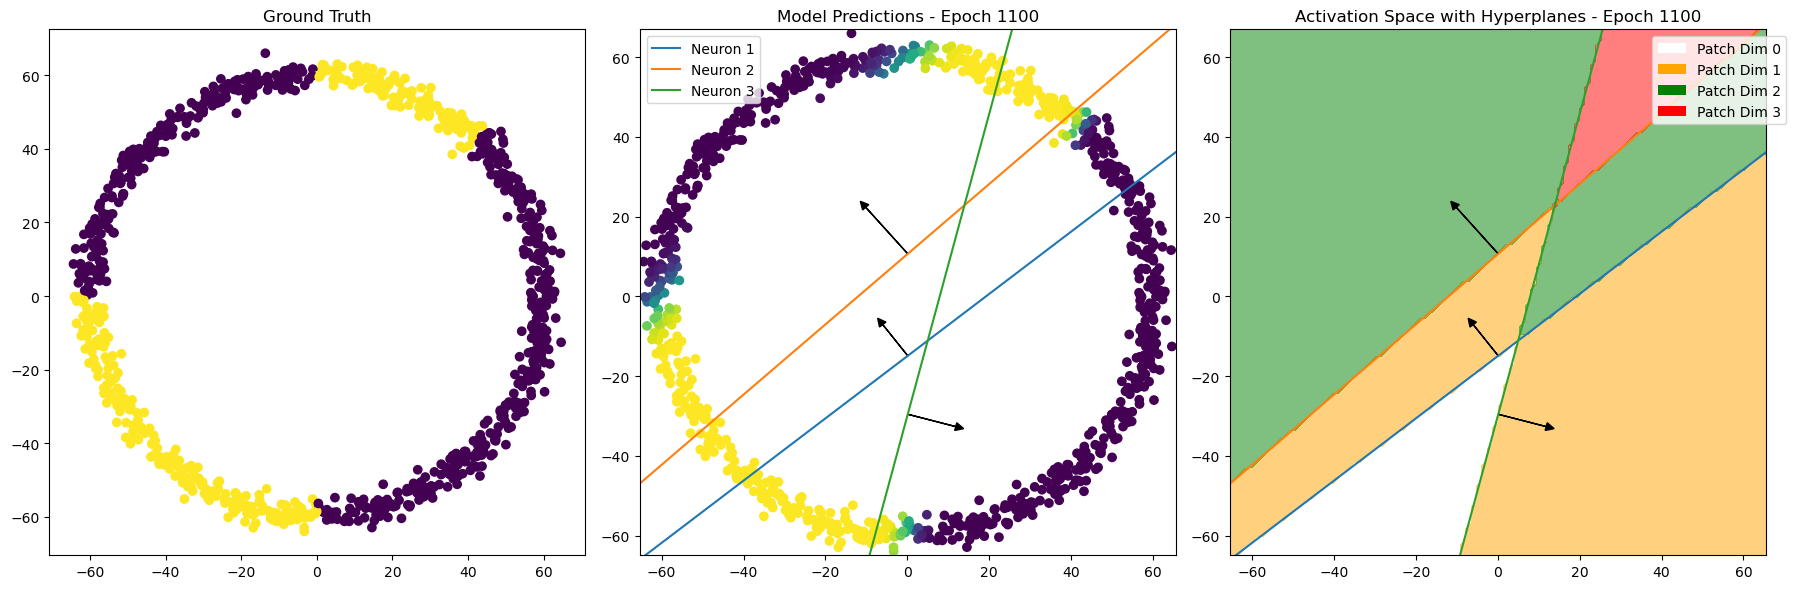

Training Progress:  60%|█████▉    | 1198/2000 [00:58<00:35, 22.71it/s]

Epoch 1200, Loss: 0.0391


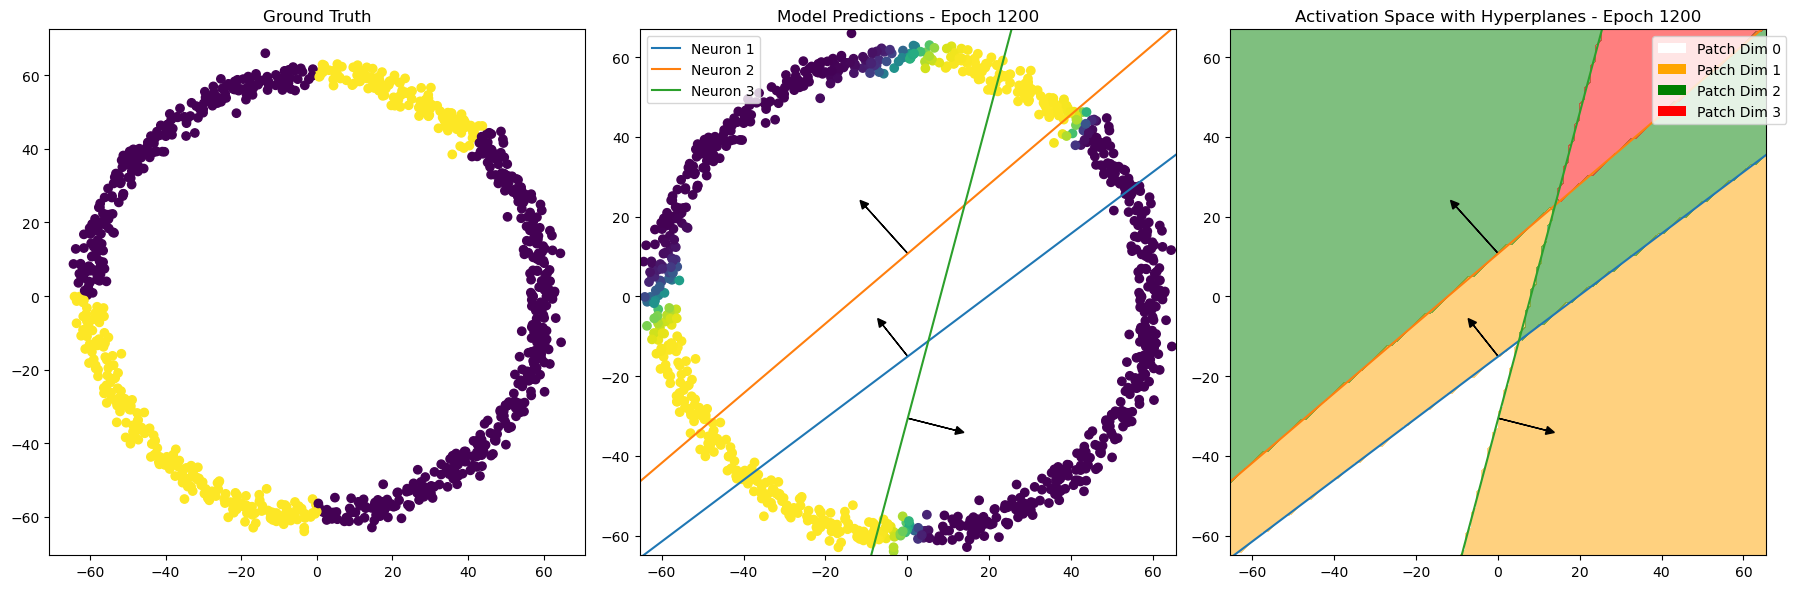

Training Progress:  65%|██████▍   | 1298/2000 [01:02<00:30, 22.82it/s]

Epoch 1300, Loss: 0.0370


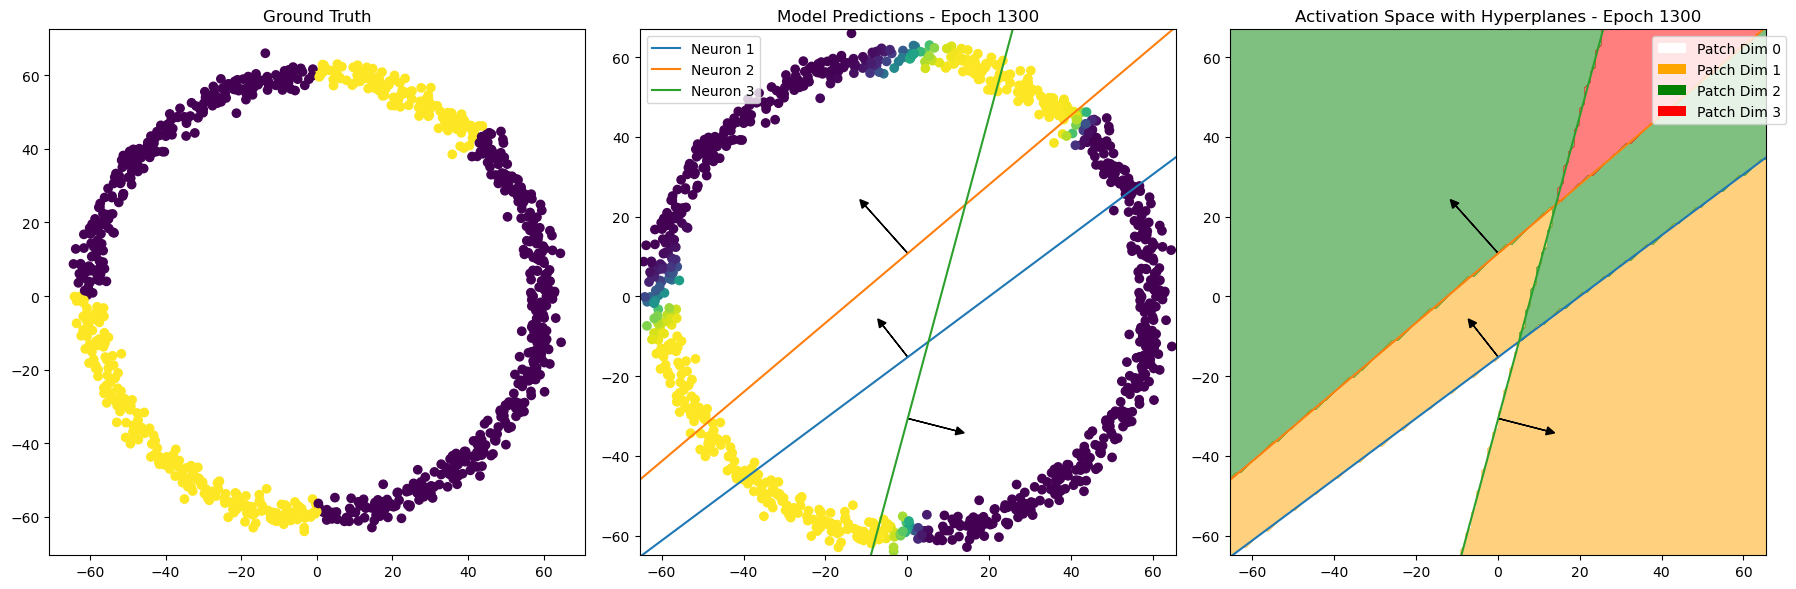

Training Progress:  70%|██████▉   | 1399/2000 [01:07<00:25, 23.54it/s]

Epoch 1400, Loss: 0.0390


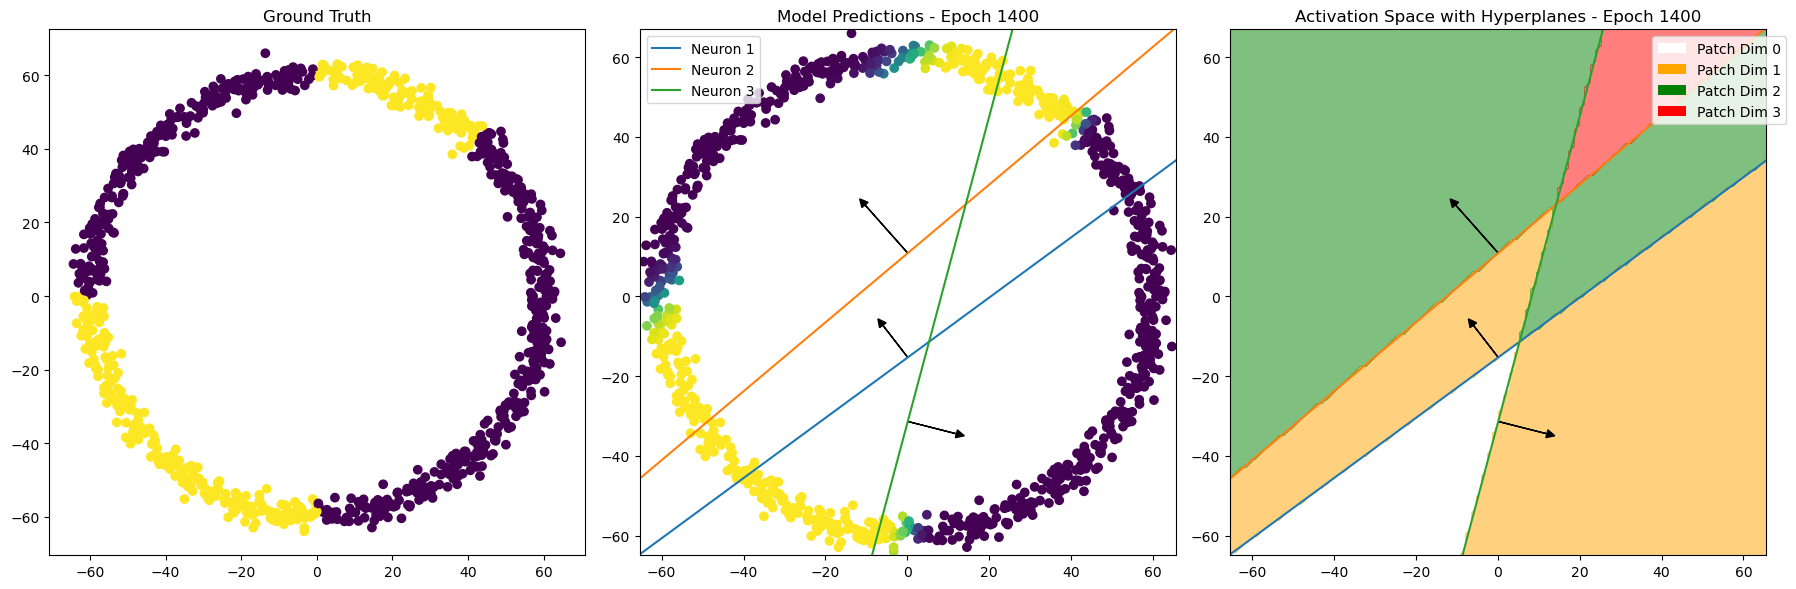

Training Progress:  75%|███████▍  | 1498/2000 [01:11<00:20, 24.18it/s]

Epoch 1500, Loss: 0.0373


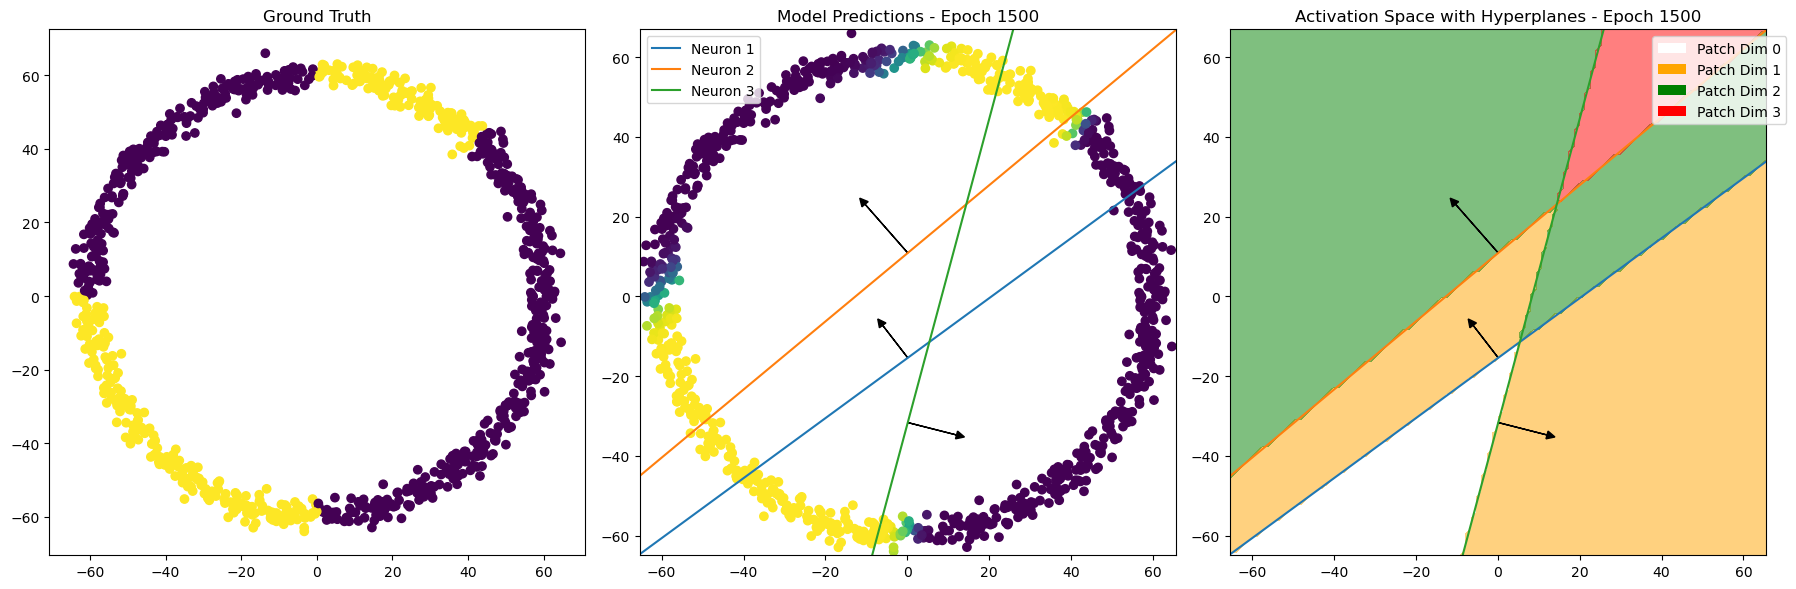

Training Progress:  80%|███████▉  | 1599/2000 [01:16<00:16, 23.74it/s]

Epoch 1600, Loss: 0.0337


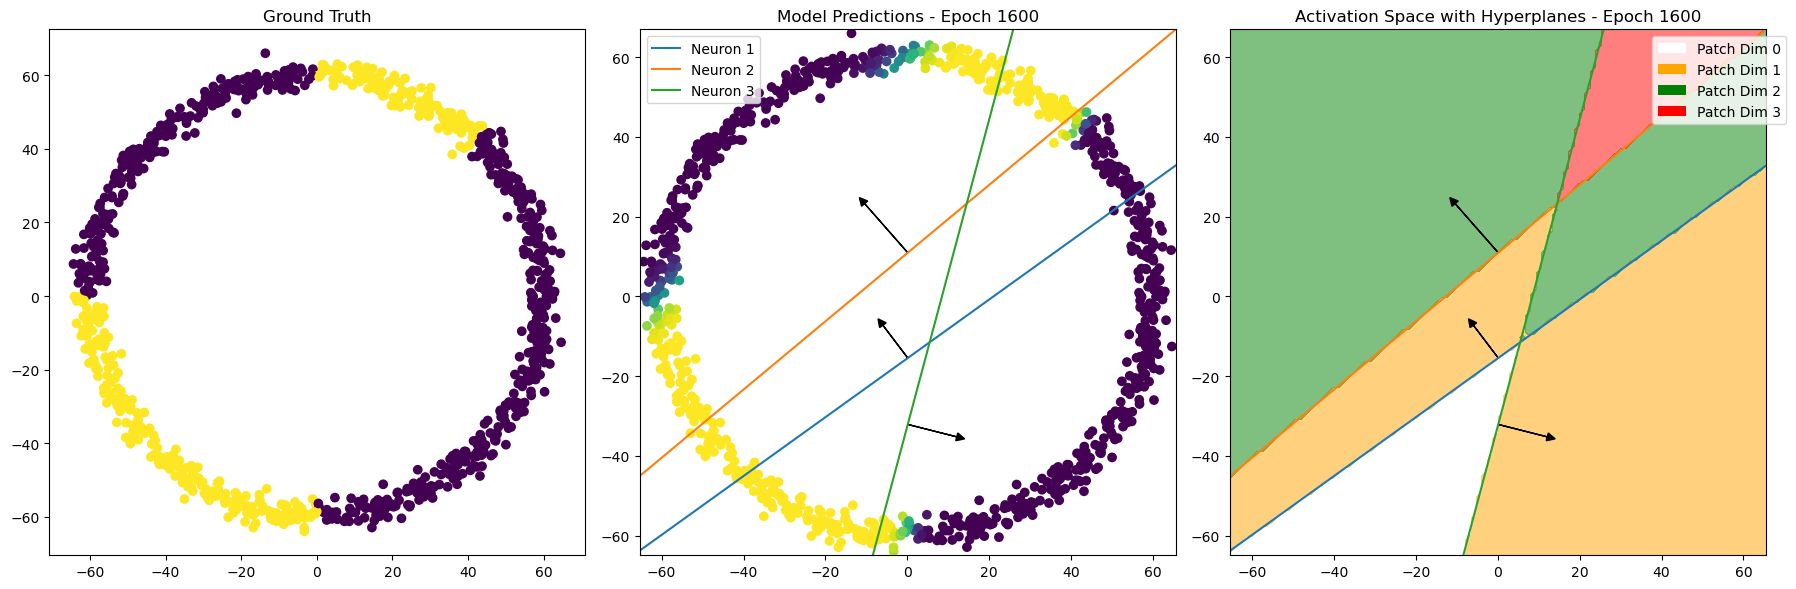

Training Progress:  85%|████████▍ | 1698/2000 [01:20<00:12, 23.84it/s]

Epoch 1700, Loss: 0.0338


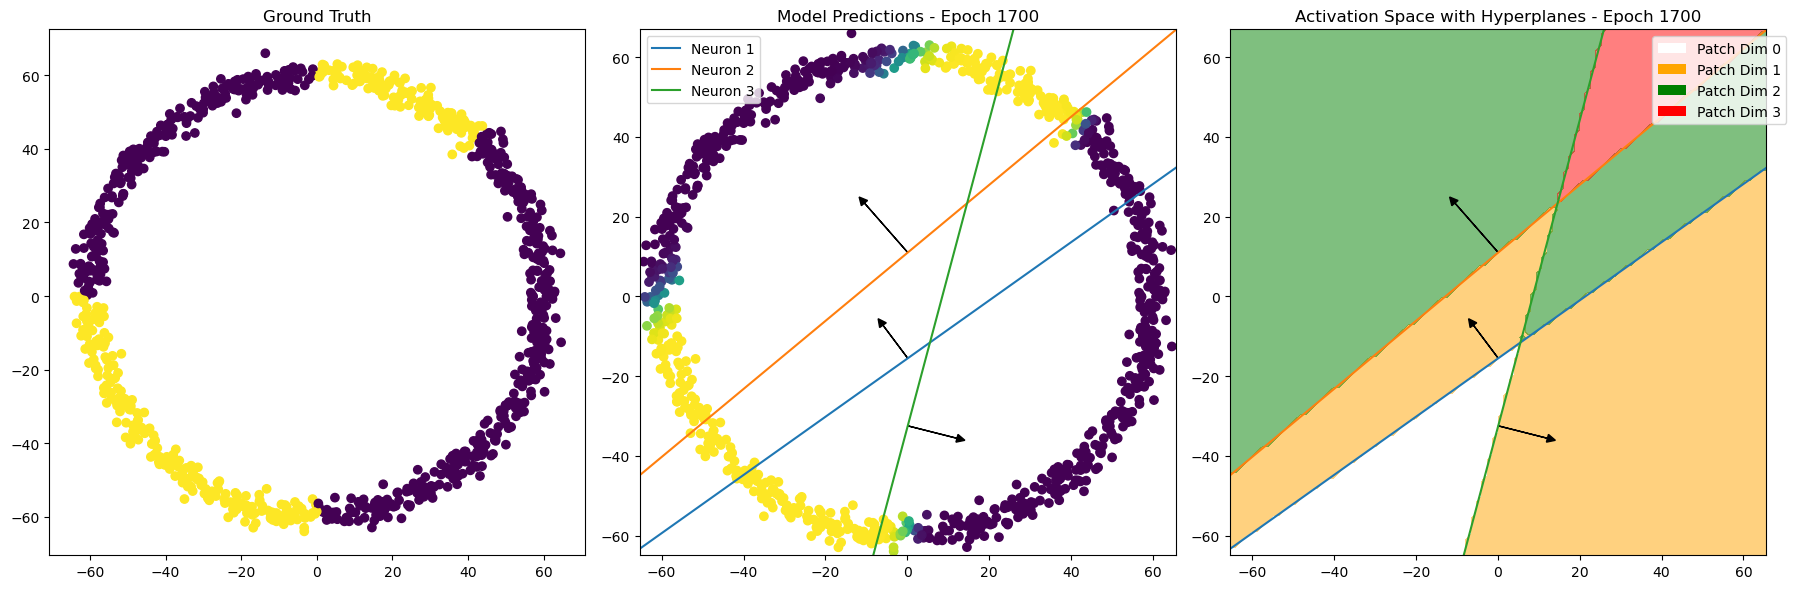

Training Progress:  90%|████████▉ | 1797/2000 [01:25<00:08, 23.77it/s]

Epoch 1800, Loss: 0.0330


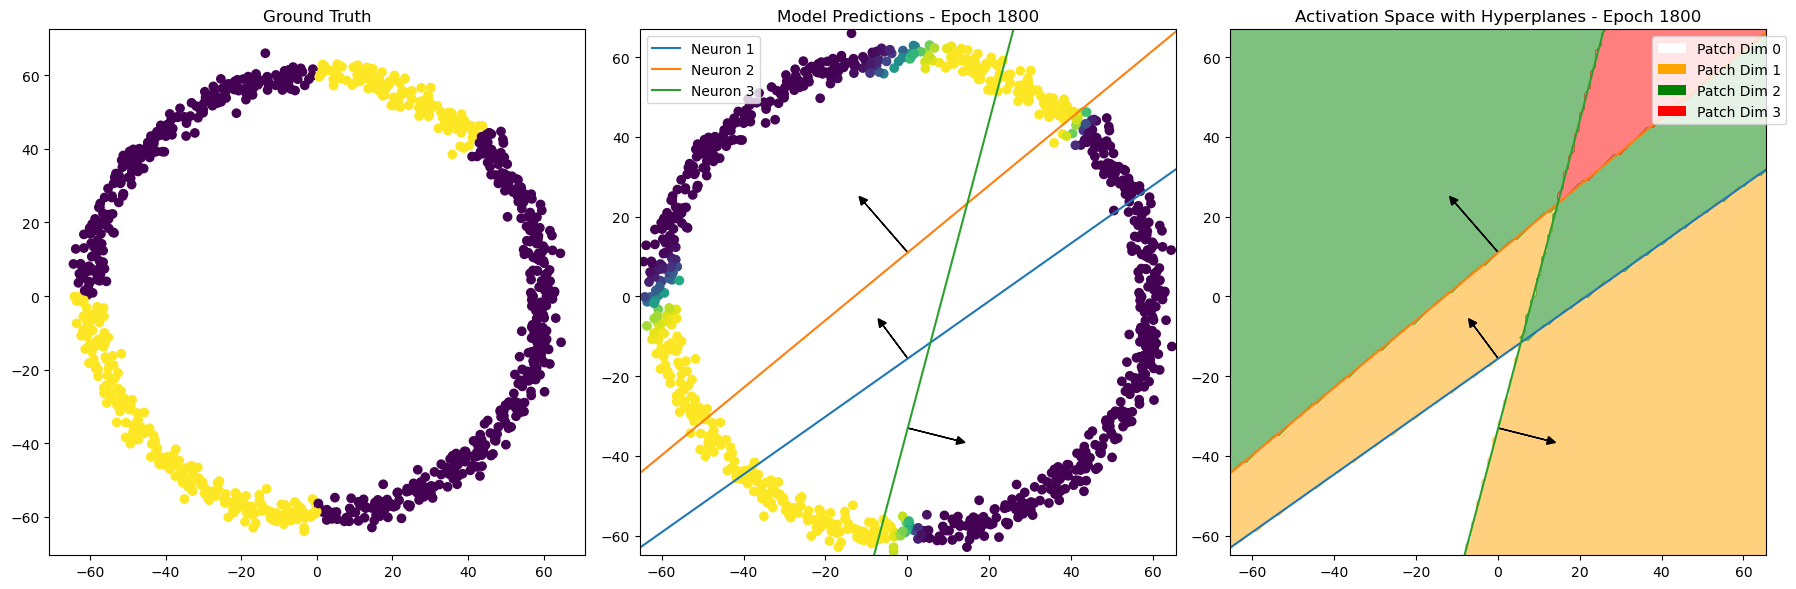

Training Progress:  95%|█████████▍| 1898/2000 [01:30<00:04, 23.27it/s]

Epoch 1900, Loss: 0.0328


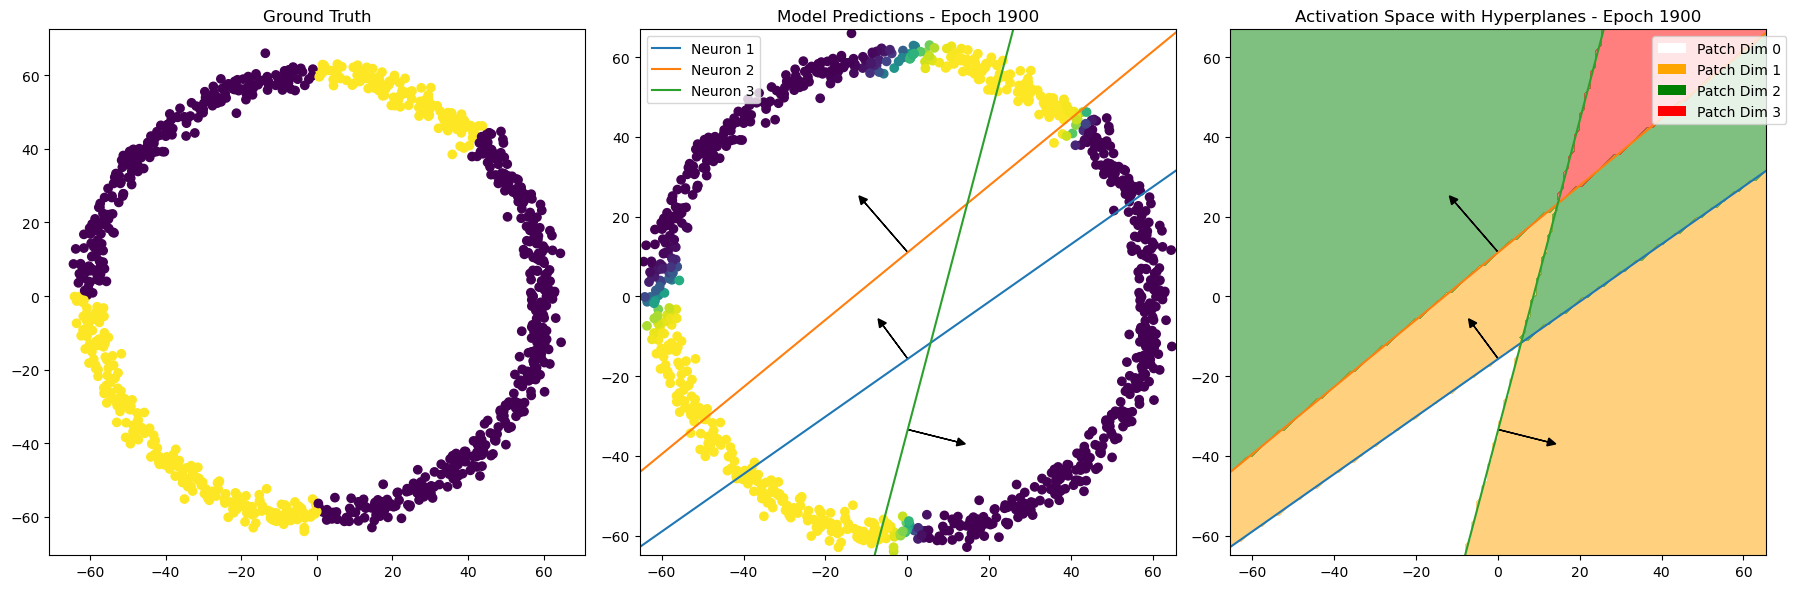

Training Progress: 100%|█████████▉| 1997/2000 [01:34<00:00, 21.73it/s]

Epoch 2000, Loss: 0.0318


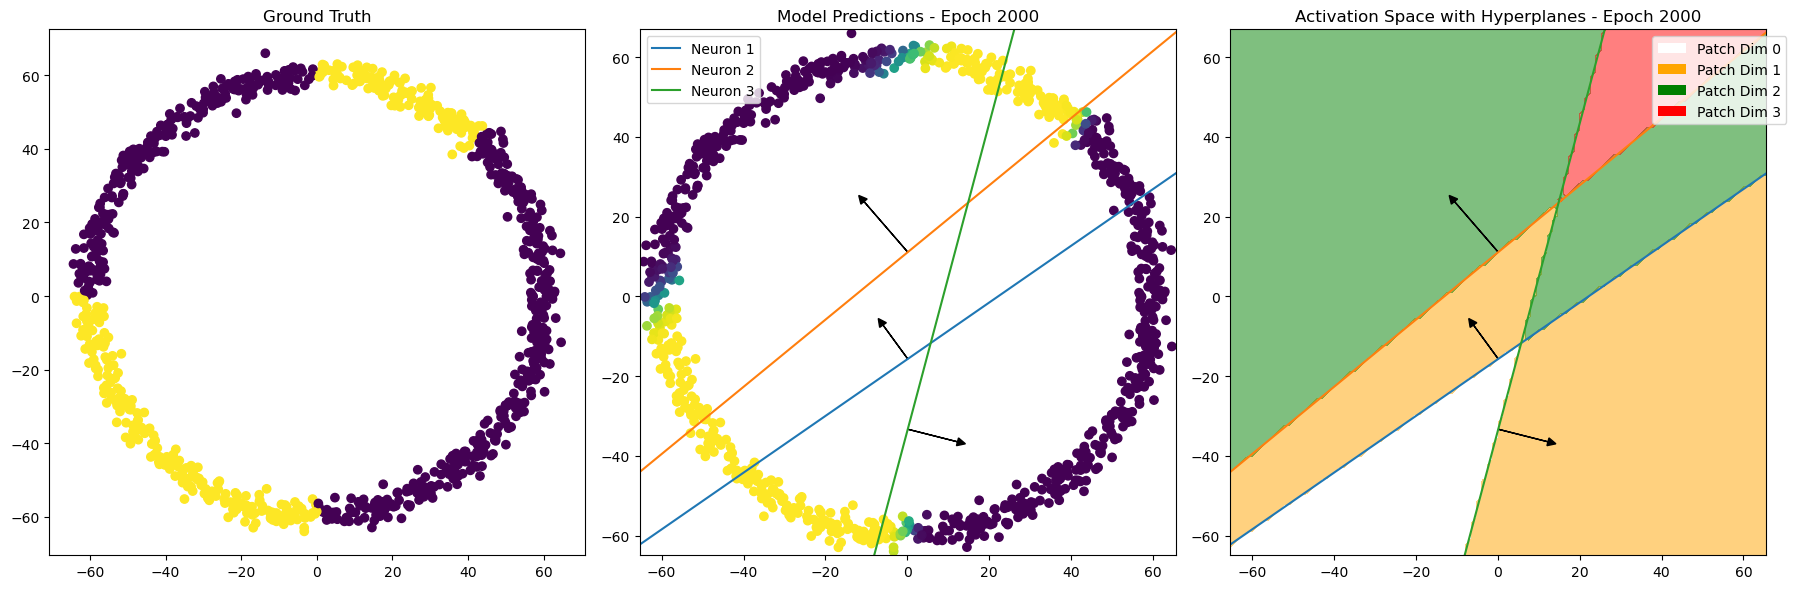

Training Progress: 100%|██████████| 2000/2000 [01:35<00:00, 20.96it/s]

Training complete.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import torch
from matplotlib.colors import ListedColormap

# Custom color map
color_map = {
    0: 'white',   # No neurons activated
    1: 'orange',  # 1 Neuron activated only
    2: 'green',   # 2 Neurons activated only
    3: 'red'      # All 3 neurons activated
}

def plot_hyperplanes_and_activations(model, ax_activation, ax_prediction, data):
    with torch.no_grad():
        # Extract weights and biases for hyperplane visualization
        weights = model.layers[0].weight.detach().cpu().numpy()
        biases = model.layers[0].bias.detach().cpu().numpy()
        
        # Define mesh grid for plotting
        x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
        y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        grid = np.c_[xx.ravel(), yy.ravel()]
        grid_tensor = torch.tensor(grid, dtype=torch.float32).to(device)

        # Compute activation spaces
        activations = model.encode(grid_tensor).detach().cpu().numpy()
        activation_sum = (activations > 0).sum(axis=1)  # Count number of activated neurons
        Z = activation_sum.reshape(xx.shape)

        # Create a custom colormap
        cmap = ListedColormap([color_map[i] for i in range(4)])

        # Plot the activation space
        contour = ax_activation.contourf(xx, yy, Z, levels=[-0.5, 0.5, 1.5, 2.5, 3.5], cmap=cmap, alpha=0.5)

        # Create legend entries
        legend_elements = [Patch(facecolor=color_map[i], label=f'{i} Neurons activated') for i in color_map]
        ax_activation.legend(handles=legend_elements, loc='upper right')

        # Plot hyperplanes on both activation space and prediction plot
        for i, (weight, bias) in enumerate(zip(weights, biases)):
            slope = -weight[0] / weight[1]
            intercept = -bias / weight[1]
            line = slope * xx[0] + intercept
            ax_activation.plot(xx[0], line, linestyle='-')
            ax_prediction.plot(xx[0], line, linestyle='-', label=f'Neuron {i+1}')
            
                        # Calculate midpoint for normal line placement
            mid_x = (x_min + x_max) / 2
            mid_y = slope * mid_x + intercept
            
            # Normal is the weight vector
            normal_end_x = mid_x + weight[0]  # Small length for visualization
            normal_end_y = mid_y + weight[1]
            
            # Draw the normal vector
            ax_activation.arrow(mid_x, mid_y, weight[0]*20, weight[1]*20, head_width=2, head_length=2, fc='k', ec='k')
            ax_prediction.arrow(mid_x, mid_y, weight[0]*20, weight[1]*20, head_width=2, head_length=2, fc='k', ec='k')

        # Adding legends that are informative
        legend_elements = [Patch(facecolor=color_map[i], label=f'Patch Dim {i}') for i in color_map]

        ax_activation.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.05, 1))
        ax_activation.set_xlim([x_min, x_max])
        ax_activation.set_ylim([y_min, y_max])
        ax_prediction.legend()
        ax_prediction.set_xlim([x_min, x_max])
        ax_prediction.set_ylim([y_min, y_max])

# Example usage in training loop and visualization
for epoch in tqdm(range(1000), desc='Training Progress'):
    model.train()
    train_loss = 0
    for batch_x, batch_y in train_dataloader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        optimizer.zero_grad()
        output = model(batch_x)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    if (epoch + 1) % 100 == 0 or epoch == 0:
        total_loss = train_loss / len(train_dataloader)
        print(f'Epoch {epoch + 1}, Loss: {total_loss:.4f}')
        
        model.eval()
        predictions = model(points_tensor.to(device)).detach().cpu().numpy().squeeze()

        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        axes[0].scatter(data[:, 0], data[:, 1], c=labels.squeeze(), cmap='viridis')
        axes[0].set_title('Ground Truth')
        
        axes[1].scatter(data[:, 0], data[:, 1], c=predictions, cmap='viridis')
        axes[1].set_title('Model Predictions - Epoch {}'.format(epoch + 1))
        
        plot_hyperplanes_and_activations(model, axes[2], axes[1], points_tensor.cpu().numpy())
        axes[2].set_title('Activation Space with Hyperplanes - Epoch {}'.format(epoch + 1))

        plt.tight_layout()
        plt.show()

print("Training complete.")

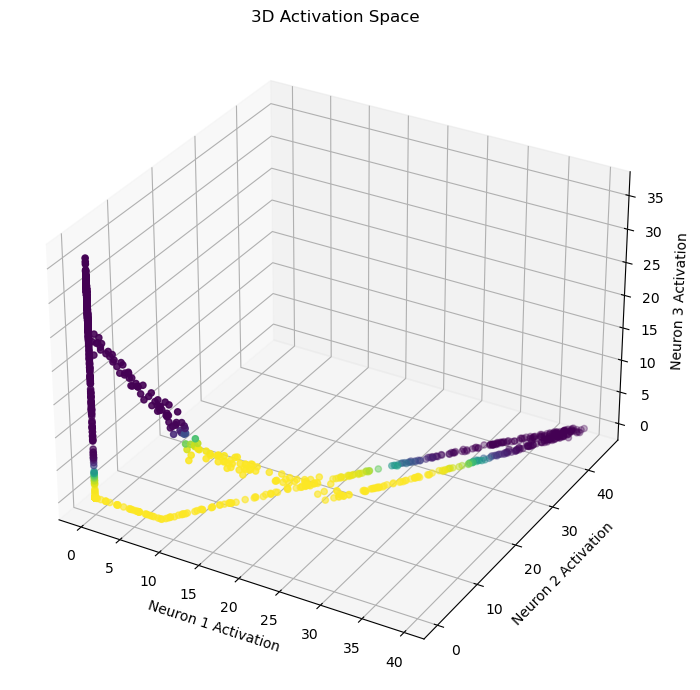

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import 3D Axes
from tqdm import tqdm
import torch
from torch.utils.data import DataLoader

# Assuming model, points_tensor, and labels are already defined
# Custom color map defined for activation space plotting

# Train your model here as per the existing loop

# After training, visualize the 3D activation space
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Use the encode function to get activations
with torch.no_grad():
    model.eval()
    activations = model.encode(points_tensor.to(device)).detach().cpu().numpy()
    predictions = model(points_tensor.to(device)).detach().cpu().numpy().squeeze()

# Save activations along with labels
formatted_labels = ['A' if label == 0 else 'B' for label in labels.squeeze()]  # Adjust based on your label processing
combined_data = np.hstack((np.array(formatted_labels).reshape(-1, 1), activations))
np.savetxt('activations_with_labels_single.csv', combined_data, delimiter=',', 
           header='class,dim_0,dim_1,dim_2', comments='', fmt='%s')

# Each axis represents the activation from one neuron
ax.scatter(activations[:, 0], activations[:, 1], activations[:, 2], c=predictions, cmap='viridis', depthshade=True)
ax.set_xlabel('Neuron 1 Activation')
ax.set_ylabel('Neuron 2 Activation')
ax.set_zlabel('Neuron 3 Activation')
ax.set_title('3D Activation Space')

plt.tight_layout()
plt.savefig('3D_activation_space_single.png')  # Save the figure as a PNG file
plt.show()